In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import modules
from matplotlib_venn import venn2 


In [2]:
df_grammy = pd.read_csv (r'grammySongs_1999-2019.csv')
df_billboard = pd.read_csv (r'billboardHot100_1999-2019.csv')

In [3]:

df_billboard.rename(columns = {'Artists':'Artist','Peak.position':'Peak_Position','Weeks.on.chart':'Weeks_on_Chart'}, inplace = True)
df_billboard=df_billboard.drop(['Lyrics', 'Writing.Credits','Unnamed: 0'], axis = 1)


In [4]:

#f=new_billboard_df.groupby(['Name']).mean()[['Weekly.rank']]
#f.reset_index(inplace=True)
df_grammy=df_grammy.drop(['Unnamed: 0', 'X'], axis = 1)

In [5]:
df_billboard

,Artist,Name,Weekly.rank,Peak_Position,Weeks_on_Chart,Week,Date,Genre,Features
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN
...,...,...,...,...,...,...,...,...,...
97220,Vitamin C,Smile,95,NaN,NaN,1999-07-12,NaN,"Jamaica,Pop",Lady Saw
97221,Collective Soul,Heavy,96,73.0,20.0,1999-07-12,NaN,"Hockey,Gaming,Soundtrack,Rock",NaN
97222,Mary Chapin Carpenter,Almost Home,97,NaN,NaN,1999-07-12,NaN,"Country,Pop",NaN
97223,Q,Vivrant Thing,98,NaN,NaN,1999-07-12,NaN,Rap,NaN


In [6]:
cleaned_bill=df_billboard.copy(deep=True)
cleaned_bill = cleaned_bill.drop_duplicates('Name', keep='first')#en güncel song durumu bırakıyor.
cleaned_bill=cleaned_bill.drop(['Weekly.rank'], axis = 1)
#cleaned_bill.to_csv("drop_duplicates_bill.csv")


In [7]:
cleaned_bill

,Artist,Name,Peak_Position,Weeks_on_Chart,Week,Date,Genre,Features
0,"Lil Nas,",Old Town Road,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",Senorita,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,Bad Guy,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,Talk,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I Don't Care,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN
...,...,...,...,...,...,...,...,...
97122,Fatboy Slim,Praise You,36.0,20.0,1999-07-19,NaN,"Techno,Pop",NaN
97124,Collin Raye,Anyone Else,37.0,20.0,1999-07-19,NaN,Country,NaN
97125,Trick Daddy,Nann,62.0,20.0,1999-07-19,NaN,Rap,Trina
97211,Clay Walker,She's Always Right,74.0,6.0,1999-07-12,NaN,Pop,NaN


In [65]:

weekly=df_billboard.groupby(['Name']).mean()[['Weekly.rank']]


In [66]:
weekly_list=weekly['Weekly.rank'].tolist()

In [67]:
cleaned_bill.insert(2, "Weekly_rank_avg",weekly_list , True)

In [68]:
cleaned_bill=cleaned_bill.reset_index(drop=True)


In [69]:
cleaned_bill

,Artist,Name,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,Week,Date,Genre,Features
0,"Lil Nas,",Old Town Road,16.478261,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",Senorita,41.736842,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,Bad Guy,48.000000,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,Talk,34.414634,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I Don't Care,38.900000,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN
...,...,...,...,...,...,...,...,...,...
6453,Fatboy Slim,Praise You,89.000000,36.0,20.0,1999-07-19,NaN,"Techno,Pop",NaN
6454,Collin Raye,Anyone Else,90.636364,37.0,20.0,1999-07-19,NaN,Country,NaN
6455,Trick Daddy,Nann,70.666667,62.0,20.0,1999-07-19,NaN,Rap,Trina
6456,Clay Walker,She's Always Right,84.461538,74.0,6.0,1999-07-12,NaN,Pop,NaN


In [70]:
cleaned_bill.to_csv("billboard_mean.csv")

In [71]:
#GRAMMY CLEAN
df_grammy

,GrammyAward,GrammyYear,Genre,Name,Artist
0,Record Of The Year,2018,General,this is America,Childish Gambino
1,Song Of The Year,2018,General,this is America,Childish Gambino
2,Best Pop Solo Performance,2018,Pop,Joanne (where Do you Think You're Goin'?),Lady Gaga
3,Best Pop Duo/Group Performance,2018,Pop,Shallow,Lady Gaga & Bradley Cooper
4,Best Dance Recording,2018,Dance/Electronic Music,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...
...,...,...,...,...,...
423,Best Rap Solo Performance,1999,Rap,My Name is,Eminem
424,Best Rap Performance By A Duo Or Group,1999,Rap,you Got Me,The roots featuring Erykah Badu
425,Best Female Country Vocal Performance,1999,Country,Man! i Feel Like a Woman!,Shania Twain
426,Best Male Country Vocal Performance,1999,Country,Choices,George Jones


In [73]:
copy_grammy=df_grammy.copy(deep=True)
cleaned_grammy=copy_grammy.drop_duplicates(['Name','Artist'], keep='first')#en güncel song durumu bırakıyor.

In [74]:
cleaned_grammy = cleaned_grammy[["Name", "Artist", "Genre","GrammyAward","GrammyYear"]]


In [75]:
cleaned_grammy=cleaned_grammy.reset_index(drop=True)


In [76]:
grammy_last=cleaned_grammy.drop(['GrammyAward','GrammyYear','Genre'], axis = 1)

In [77]:
grammy_last

,Name,Artist
0,this is America,Childish Gambino
1,Joanne (where Do you Think You're Goin'?),Lady Gaga
2,Shallow,Lady Gaga & Bradley Cooper
3,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...
4,when Bad Does Good,Chris Cornell
...,...,...
372,My Name is,Eminem
373,you Got Me,The roots featuring Erykah Badu
374,Man! i Feel Like a Woman!,Shania Twain
375,Choices,George Jones


In [78]:
cleaned_bill[cleaned_bill['Name'] == 'This Is America']

,Artist,Name,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,Week,Date,Genre,Features
546,Childish Gambino,This Is America,72.0,1.0,17.0,2018-09-08,"May 6, 2018","Protest Songs,Hip-Hop,Memes,Gospel,Trap,Rap",NaN


In [79]:
grammy_last.insert(2, "grammy_win",'1' , True)

In [80]:
grammy_last

,Name,Artist,grammy_win
0,this is America,Childish Gambino,1
1,Joanne (where Do you Think You're Goin'?),Lady Gaga,1
2,Shallow,Lady Gaga & Bradley Cooper,1
3,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...,1
4,when Bad Does Good,Chris Cornell,1
...,...,...,...
372,My Name is,Eminem,1
373,you Got Me,The roots featuring Erykah Badu,1
374,Man! i Feel Like a Woman!,Shania Twain,1
375,Choices,George Jones,1


In [81]:
grammy_last['Name'] = grammy_last['Name'].str.upper()
cleaned_bill['Name']=cleaned_bill['Name'].str.upper()

In [82]:
grammy_last

,Name,Artist,grammy_win
0,THIS IS AMERICA,Childish Gambino,1
1,JOANNE (WHERE DO YOU THINK YOU'RE GOIN'?),Lady Gaga,1
2,SHALLOW,Lady Gaga & Bradley Cooper,1
3,ELECTRICITY,Silk City & Dua Lipa Featuring Diplo & Mark Ro...,1
4,WHEN BAD DOES GOOD,Chris Cornell,1
...,...,...,...
372,MY NAME IS,Eminem,1
373,YOU GOT ME,The roots featuring Erykah Badu,1
374,MAN! I FEEL LIKE A WOMAN!,Shania Twain,1
375,CHOICES,George Jones,1


In [83]:
cleaned_bill

,Artist,Name,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,Week,Date,Genre,Features
0,"Lil Nas,",OLD TOWN ROAD,16.478261,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",SENORITA,41.736842,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,BAD GUY,48.000000,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,TALK,34.414634,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I DON'T CARE,38.900000,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN
...,...,...,...,...,...,...,...,...,...
6453,Fatboy Slim,PRAISE YOU,89.000000,36.0,20.0,1999-07-19,NaN,"Techno,Pop",NaN
6454,Collin Raye,ANYONE ELSE,90.636364,37.0,20.0,1999-07-19,NaN,Country,NaN
6455,Trick Daddy,NANN,70.666667,62.0,20.0,1999-07-19,NaN,Rap,Trina
6456,Clay Walker,SHE'S ALWAYS RIGHT,84.461538,74.0,6.0,1999-07-12,NaN,Pop,NaN


In [84]:
na_bill=cleaned_bill.copy(deep=True)
na_bill.dropna(subset=['Weeks_on_Chart', 'Weekly_rank_avg','Name','Peak_Position','Artist'])

,Artist,Name,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,Week,Date,Genre,Features
0,"Lil Nas,",OLD TOWN ROAD,16.478261,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
2,Billie Eilish,BAD GUY,48.000000,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,TALK,34.414634,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I DON'T CARE,38.900000,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN
5,Jonas Brothers,SUCKER,19.461538,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop",NaN
...,...,...,...,...,...,...,...,...,...
6453,Fatboy Slim,PRAISE YOU,89.000000,36.0,20.0,1999-07-19,NaN,"Techno,Pop",NaN
6454,Collin Raye,ANYONE ELSE,90.636364,37.0,20.0,1999-07-19,NaN,Country,NaN
6455,Trick Daddy,NANN,70.666667,62.0,20.0,1999-07-19,NaN,Rap,Trina
6456,Clay Walker,SHE'S ALWAYS RIGHT,84.461538,74.0,6.0,1999-07-12,NaN,Pop,NaN


In [85]:
na_bill=na_bill.drop(['Week','Date','Features'], axis = 1)
na_bill.to_csv("edited_bill.csv")

In [8]:
billboard_upper=pd.read_csv("edited_bill.csv")
billboard_upper['Artist']=billboard_upper['Artist'].str.upper()
billboard_upper['Genre']=billboard_upper['Genre'].str.upper()

In [13]:
billboard_upper.drop(['Unnamed: 0'], axis = 1,inplace=True)

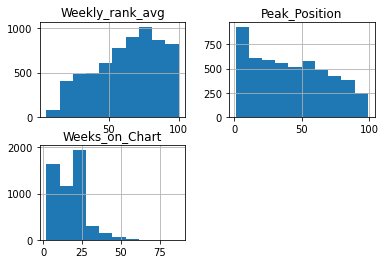

In [14]:
# create histogram for numeric data
billboard_upper.hist()
  
# show plot
plt.show()

In [88]:
grammy_last['Artist'] = grammy_last['Artist'].str.upper()
grammy_last

,Name,Artist,grammy_win
0,THIS IS AMERICA,CHILDISH GAMBINO,1
1,JOANNE (WHERE DO YOU THINK YOU'RE GOIN'?),LADY GAGA,1
2,SHALLOW,LADY GAGA & BRADLEY COOPER,1
3,ELECTRICITY,SILK CITY & DUA LIPA FEATURING DIPLO & MARK RO...,1
4,WHEN BAD DOES GOOD,CHRIS CORNELL,1
...,...,...,...
372,MY NAME IS,EMINEM,1
373,YOU GOT ME,THE ROOTS FEATURING ERYKAH BADU,1
374,MAN! I FEEL LIKE A WOMAN!,SHANIA TWAIN,1
375,CHOICES,GEORGE JONES,1


In [89]:
grammy_last.to_csv("unique_grammy.csv")

In [90]:
billboard_upper.to_csv("upper_billboard.csv")

In [91]:
billboard_upper

,Unnamed: 0,Artist,Name,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,Genre
0,0,"LIL NAS,",OLD TOWN ROAD,16.478261,1.0,7.0,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR..."
1,1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,41.736842,NaN,NaN,POP
2,2,BILLIE EILISH,BAD GUY,48.000000,2.0,13.0,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ..."
3,3,KHALID,TALK,34.414634,3.0,20.0,"SYNTH-POP,POP"
4,4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,38.900000,2.0,7.0,"CANADA,UK,DANCE,DANCE-POP,POP"
...,...,...,...,...,...,...,...
6453,6453,FATBOY SLIM,PRAISE YOU,89.000000,36.0,20.0,"TECHNO,POP"
6454,6454,COLLIN RAYE,ANYONE ELSE,90.636364,37.0,20.0,COUNTRY
6455,6455,TRICK DADDY,NANN,70.666667,62.0,20.0,RAP
6456,6456,CLAY WALKER,SHE'S ALWAYS RIGHT,84.461538,74.0,6.0,POP


In [92]:
billboard_upper.isna().sum()

Unnamed: 0            0
Artist                0
Name                  0
Weekly_rank_avg       0
Peak_Position      1149
Weeks_on_Chart     1149
Genre                 0
dtype: int64

In [93]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [94]:
bill_cop=billboard_upper.copy()
bill_cop=bill_cop.drop(['Artist','Name','Genre'],axis=1)

In [95]:
scaler = MinMaxScaler()
bill_cop = pd.DataFrame(scaler.fit_transform(bill_cop), columns = bill_cop.columns)
bill_cop.head()

,Unnamed: 0,Weekly_rank_avg,Peak_Position,Weeks_on_Chart
0,0.000000,0.118093,0.000000,0.058824
1,0.000155,0.384799,NaN,NaN
2,0.000310,0.450932,0.010204,0.129412
3,0.000465,0.307484,0.020408,0.211765
4,0.000619,0.354845,0.010204,0.058824


In [96]:
imputer = KNNImputer(n_neighbors=5)
bill_cop_normalized= pd.DataFrame(imputer.fit_transform(bill_cop),columns = bill_cop.columns)

In [97]:
bill_cop_normalized.isna().sum()

Unnamed: 0         0
Weekly_rank_avg    0
Peak_Position      0
Weeks_on_Chart     0
dtype: int64

In [98]:
bill_cop2=billboard_upper.copy()
bill_cop2=bill_cop2.drop(['Unnamed: 0','Weekly_rank_avg','Peak_Position','Weeks_on_Chart'],axis=1)
bill_knn= pd.concat([bill_cop2, bill_cop_normalized], axis=1)

In [99]:
bill_knn.drop(['Unnamed: 0'],axis=1)

,Artist,Name,Genre,Weekly_rank_avg,Peak_Position,Weeks_on_Chart
0,"LIL NAS,",OLD TOWN ROAD,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR...",0.118093,0.000000,0.058824
1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.384799,0.136735,0.209412
2,BILLIE EILISH,BAD GUY,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ...",0.450932,0.010204,0.129412
3,KHALID,TALK,"SYNTH-POP,POP",0.307484,0.020408,0.211765
4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,"CANADA,UK,DANCE,DANCE-POP,POP",0.354845,0.010204,0.058824
...,...,...,...,...,...,...
6453,FATBOY SLIM,PRAISE YOU,"TECHNO,POP",0.883851,0.357143,0.211765
6454,COLLIN RAYE,ANYONE ELSE,COUNTRY,0.901129,0.367347,0.211765
6455,TRICK DADDY,NANN,RAP,0.690269,0.622449,0.211765
6456,CLAY WALKER,SHE'S ALWAYS RIGHT,POP,0.835929,0.744898,0.047059


In [100]:
bill_knn.isna().sum()

Artist             0
Name               0
Genre              0
Unnamed: 0         0
Weekly_rank_avg    0
Peak_Position      0
Weeks_on_Chart     0
dtype: int64

In [101]:
bill_knn_last = bill_knn.drop_duplicates(['Name','Artist'], keep='first')#en güncel song durumu bırakıyor.


In [102]:
bill_knn_last

,Artist,Name,Genre,Unnamed: 0,Weekly_rank_avg,Peak_Position,Weeks_on_Chart
0,"LIL NAS,",OLD TOWN ROAD,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR...",0.000000,0.118093,0.000000,0.058824
1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.000155,0.384799,0.136735,0.209412
2,BILLIE EILISH,BAD GUY,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ...",0.000310,0.450932,0.010204,0.129412
3,KHALID,TALK,"SYNTH-POP,POP",0.000465,0.307484,0.020408,0.211765
4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,"CANADA,UK,DANCE,DANCE-POP,POP",0.000619,0.354845,0.010204,0.058824
...,...,...,...,...,...,...,...
6453,FATBOY SLIM,PRAISE YOU,"TECHNO,POP",0.999381,0.883851,0.357143,0.211765
6454,COLLIN RAYE,ANYONE ELSE,COUNTRY,0.999535,0.901129,0.367347,0.211765
6455,TRICK DADDY,NANN,RAP,0.999690,0.690269,0.622449,0.211765
6456,CLAY WALKER,SHE'S ALWAYS RIGHT,POP,0.999845,0.835929,0.744898,0.047059


In [103]:
grammy_last.isna().sum()

Name           0
Artist        11
grammy_win     0
dtype: int64

In [104]:
grammy_last.dropna(subset=['Artist'])

,Name,Artist,grammy_win
0,THIS IS AMERICA,CHILDISH GAMBINO,1
1,JOANNE (WHERE DO YOU THINK YOU'RE GOIN'?),LADY GAGA,1
2,SHALLOW,LADY GAGA & BRADLEY COOPER,1
3,ELECTRICITY,SILK CITY & DUA LIPA FEATURING DIPLO & MARK RO...,1
4,WHEN BAD DOES GOOD,CHRIS CORNELL,1
...,...,...,...
372,MY NAME IS,EMINEM,1
373,YOU GOT ME,THE ROOTS FEATURING ERYKAH BADU,1
374,MAN! I FEEL LIKE A WOMAN!,SHANIA TWAIN,1
375,CHOICES,GEORGE JONES,1


In [105]:
bill_knn_last.to_csv("billboard_toMerge.csv")
grammy_last.to_csv("grammy_toMerge.csv")

In [4]:
df_2020 = pd.read_csv (r'bill2020.csv')
cpy_bill2020=df_2020.copy(deep=True)

cpy_bill2020.head()


,Unnamed: 0,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
0,0,1,Mariah Carey,All I Want For Christmas Is You,1,1,37,2020-01-04
1,1,2,Brenda Lee,Rockin' Around The Christmas Tree,2,2,32,2020-01-04
2,2,3,Bobby Helms,Jingle Bell Rock,9,3,30,2020-01-04
3,3,4,Burl Ives,A Holly Jolly Christmas,6,4,15,2020-01-04
4,4,5,Post Malone,Circles,3,1,17,2020-01-04


In [75]:
weekly=cpy_bill2020.groupby(['song']).mean()[['rank_last_week']]
weekly_list=weekly['rank_last_week'].tolist()
cpy_bill2020.insert(2, "Weekly_rank_avg",weekly_list , True)


ValueError: Length of values (476) does not match length of index (5300)

In [12]:
cpy_bill2020.drop(['Unnamed: 0','date'],inplace=True,axis=1)

In [13]:
cpy_bill2020

,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart
0,1,Mariah Carey,All I Want For Christmas Is You,1,1,37
1,2,Brenda Lee,Rockin' Around The Christmas Tree,2,2,32
2,3,Bobby Helms,Jingle Bell Rock,9,3,30
3,4,Burl Ives,A Holly Jolly Christmas,6,4,15
4,5,Post Malone,Circles,3,1,17
...,...,...,...,...,...,...
5295,96,Kelsea Ballerini,Hole In The Bottle,0,72,10
5296,97,Taylor Swift Featuring HAIM,"No Body, No Crime",34,34,2
5297,98,DDG,Moonwalking In Calabasas,0,98,1
5298,99,King Von,Took Her To The O,0,47,6


In [76]:
badguy=cpy_bill2020[cpy_bill2020['artist']=='Billie Eilish'][cpy_bill2020['song']=='Bad Guy']
weekly=badguy.groupby(['artist']).mean()[['rank_last_week']]
weekly_list=weekly['rank_last_week'].tolist()
avg=weekly[["rank_last_week"]]
badguy["avg"]=avg



<ipython-input-76-7675e669ca0a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  badguy=cpy_bill2020[cpy_bill2020['artist']=='Billie Eilish'][cpy_bill2020['song']=='Bad Guy']


,rank_last_week
artist,
Billie Eilish,28.454545


In [72]:
badguy

,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,avg
22,23,Billie Eilish,Bad Guy,25,1,39,NaN
113,14,Billie Eilish,Bad Guy,23,1,40,NaN
232,33,Billie Eilish,Bad Guy,14,1,41,NaN
339,40,Billie Eilish,Bad Guy,33,1,42,NaN
440,41,Billie Eilish,Bad Guy,40,1,43,NaN
516,17,Billie Eilish,Bad Guy,41,1,44,NaN
624,25,Billie Eilish,Bad Guy,17,1,45,NaN
728,29,Billie Eilish,Bad Guy,25,1,46,NaN
829,30,Billie Eilish,Bad Guy,29,1,47,NaN
935,36,Billie Eilish,Bad Guy,30,1,48,NaN


In [74]:
weekly.get_value(0, 'rank_last_week')


AttributeError: 'DataFrame' object has no attribute 'get_value'